# ***Hotel Booking Analysis*** #

 # **Bugade Revansh Sidraya**


# *Objective*

**1)Identify trends and patterns in booking behaviors, including peak booking periods, popular room types, and average lead times.**

**2)Examine the frequency and reasons for cancellations, and how they vary by hotel type, room type, and booking lead time**

**3)Compare metrics such as average waiting times, cancellation rates, and booking patterns between different types of hotels (e.g., city hotels vs. resorts).**

**4)Identify factors affecting booking and cancellation rates to optimize pricing strategies and maximize revenue.**

**5) This data is (2015 - 2017)**

# ***Github Link***

### *https://github.com/revanshbugade/Sprint-2*

In [ ]:
#Installing packages
!pip install mysql-connector-python
!pip install pymysql
!pip3 install pymysql

Requirement already satisfied: mysql-connector-python in c:\users\acer\anaconda3\lib\site-packages (9.0.0)
Requirement already satisfied: pymysql in c:\users\acer\anaconda3\lib\site-packages (1.1.1)
Requirement already satisfied: pymysql in c:\users\acer\anaconda3\lib\site-packages (1.1.1)


In [5]:
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ***Import necessary packages***

In [6]:
connection = mysql.connector.connect(
    user='root',
    password='security',
    host='localhost',
    port=3306,
    database='HotelBookingAnalysis'
)


# **Exploratory Data Analysis**

In [26]:
query = 'select * from hotel_booking_analysis'
df = pd.read_sql(query, connection)
df.head()
df

C:\Users\bugad\AppData\Local\Temp\ipykernel_15640\3721592830.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, connection)


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone_number,credit_card
0,Resort Hotel,0,34,2024,January,2,5,2,4,2,...,Transient,120.50,1,2,Check-Out,2024-01-05,John Doe,john.doe@example.com,555-1234,1234-5678-9012-3456
1,City Hotel,1,45,2024,February,6,12,1,3,1,...,Contract,80.75,0,1,Cancelled,2024-02-08,Jane Smith,jane.smith@example.com,555-5678,4321-8765-4321-8765
2,Resort Hotel,0,50,2024,March,10,20,2,5,3,...,Transient,150.00,1,3,Check-Out,2024-03-15,Alice Brown,alice.brown@example.com,555-2345,5678-1234-5678-1234
3,City Hotel,1,20,2024,April,14,10,0,2,1,...,Transient,75.50,0,1,Cancelled,2024-04-01,Bob Smith,bob.smith@example.com,555-3456,7890-1234-5678-3456
4,Resort Hotel,0,10,2024,May,18,15,1,3,2,...,Transient,110.75,2,0,Check-Out,2024-05-10,Carol Johnson,carol.johnson@example.com,555-4567,3456-7890-1234-5678
5,City Hotel,1,28,2024,June,22,25,1,5,2,...,Contract,95.00,0,1,No-Show,2024-06-20,David White,david.white@example.com,555-6789,6789-3456-7890-2345
6,Resort Hotel,0,60,2024,July,30,5,3,7,3,...,Transient,250.25,1,4,Check-Out,2024-07-10,Emily Green,emily.green@example.com,555-7890,7890-2345-6789-0123
7,Resort Hotel,0,21,2023,January,3,15,2,5,2,...,Transient,120.50,1,2,Check-Out,2023-01-16,John Doe,johndoe@example.com,555-1234,4111111111111111
8,City Hotel,1,45,2023,February,7,10,1,3,1,...,Contract,90.00,0,1,Canceled,2023-02-05,Alice Smith,alice.smith@example.com,555-5678,5555555555554444
9,Resort Hotel,0,60,2023,March,12,25,3,4,2,...,Transient,150.75,1,0,Check-Out,2023-03-26,Carlos Diaz,carlos.diaz@example.es,555-9876,378282246310005


**Insight**  
Loading the file from local system to jupyter notebook

In [9]:
# Prints the shape i.e. the row size by column size of the dataset
df.shape

(51, 36)

**Insight**   
Here we print row nad column size of the Dataset

In [12]:
#To print the column names present in the dataset.
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'name', 'email',
       'phone_number', 'credit_card'],
      dtype='object')

**Insight**  
Print the column name present in the dataset

# ***Understanding Variable***

**Hotel:** (Resort Hotel or City Hotel)

**is_canceled:** Value indicating if the booking was canceled (1) or not (0)

**lead_time :** Number of days that elapsed between the entering date of the booking into the PMS and the arrival date*

**arrival_date_year:** Year of arrival date

**arrival_date_month :** Month of arrival date

**arrival_date_week_number :** Week number of year for arrival date

**arrival_date_day_of_month :** Day of arrival date

**stays_in_weekend_nights :** Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel

**stays_in_week_nights :** Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel

**adults :** Number of adults

**children :** Number of children

**babies :** Number of babies

**meal :** Type of meal booked. Categories are presented in standard hospitality meal packages

**country :** Country of origin.` market_segment : Market segment designation. In categories, the term “TA” means “Travel Agents” and “TO” means “Tour Operators”

**distribution_channel :** Booking distribution channel. The term “TA” means “Travel Agents” and “TO” means “Tour Operators”

**is_repeated_guest :** Value indicating if the booking name was from a repeated guest (1) or not (0)

**previous_cancellations :** Number of previous bookings that were cancelled by the customer prior to the current booking

**previous_bookings_not_canceled :** Number of previous bookings not cancelled by the customer prior to the current booking

**reserved_room_type :** Code of room type reserved. Code is presented instead of designation for anonymity reasons.

**assigned_room_type :** Code for the type of room assigned to the booking.

**booking_changes :** Number of changes/amendments made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation

**deposit_type :** Indication on if the customer made a deposit to guarantee the booking.

**agent :** ID of the travel agency that made the booking

**company :** ID of the company/entity that made the booking or responsible for paying the booking.

**days_in_waiting_list :** Number of days the booking was in the waiting list before it was confirmed to the customer

**customer_type :** Type of booking, assuming one of four categories

**adr :** Average Daily Rate as defined by dividing the sum of all lodging transactions by the total number of staying nights

**required_car_parking_spaces :** Number of car parking spaces required by the customer

**total_of_special_requests :** Number of special requests made by the customer (e.g. twin bed or high floor)

**reservation_status :** Reservation last status, assuming one of three categories

**Canceled –** booking was canceled by the customer

**Check-Out –** customer has checked in but already departed

**No-Show –** customer did not check-in and did inform the hotel of the reason why

**reservation_status_date -** Date at which the last status was set

# **Data Cleaning**

In [13]:
# To Check null values in dataset
df.isnull().values.any()

np.True_

In [14]:
# It is used to identify and count missing values (NaNs) in a DataFrame
df.isnull().sum()


hotel                              0
is_canceled                        0
lead_time                          0
arrival_date_year                  0
arrival_date_month                 0
arrival_date_week_number           0
arrival_date_day_of_month          0
stays_in_weekend_nights            0
stays_in_week_nights               0
adults                             0
children                           0
babies                             0
meal                               0
country                            0
market_segment                     0
distribution_channel               0
is_repeated_guest                  0
previous_cancellations             0
previous_bookings_not_canceled     0
reserved_room_type                 0
assigned_room_type                 0
booking_changes                    0
deposit_type                       0
agent                             13
company                           25
days_in_waiting_list               0
customer_type                      0
a

**Insight**  
Here we used isnull().sum() to identify and count missing values (NaNs) in a DataFrame

# ***Duplicate Values***

In [16]:
# to check for duplicate rows in a DataFrame
df.duplicated().sum()

np.int64(0)

**Insight**  
Here we can see there are 0 duplicates values in our dataframe.

***Arrival Column***

In [17]:
# To get the arrival date as a datetime object
df['arrival_date'] = df['arrival_date_year'].astype(str) + '-' + df['arrival_date_month'] + '-' + df['arrival_date_day_of_month'].astype(str)
df['arrival_date'] = pd.to_datetime(df['arrival_date'])
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone_number,credit_card,arrival_date
0,Resort Hotel,0,34,2024,January,2,5,2,4,2,...,120.50,1,2,Check-Out,2024-01-05,John Doe,john.doe@example.com,555-1234,1234-5678-9012-3456,2024-01-05
1,City Hotel,1,45,2024,February,6,12,1,3,1,...,80.75,0,1,Cancelled,2024-02-08,Jane Smith,jane.smith@example.com,555-5678,4321-8765-4321-8765,2024-02-12
2,Resort Hotel,0,50,2024,March,10,20,2,5,3,...,150.00,1,3,Check-Out,2024-03-15,Alice Brown,alice.brown@example.com,555-2345,5678-1234-5678-1234,2024-03-20
3,City Hotel,1,20,2024,April,14,10,0,2,1,...,75.50,0,1,Cancelled,2024-04-01,Bob Smith,bob.smith@example.com,555-3456,7890-1234-5678-3456,2024-04-10
4,Resort Hotel,0,10,2024,May,18,15,1,3,2,...,110.75,2,0,Check-Out,2024-05-10,Carol Johnson,carol.johnson@example.com,555-4567,3456-7890-1234-5678,2024-05-15


***Insight***  
Here we merge 3 columns i.e arrival_date_year , arrival_date_month ,arrival_date_day_of_month into 1 column i.e arrival_date



In [18]:
# Check Unique Values for each variable.
pd.Series({col:df[col].unique() for col in df})           # creating a series consisting every column name of the dataset and it's value.
                                                                # used for loop to iterate over every column in the dataset

hotel                                                    [Resort Hotel, City Hotel]
is_canceled                                                                  [0, 1]
lead_time                         [34, 45, 50, 20, 10, 28, 60, 21, 120, 5, 12, 7...
arrival_date_year                                          [2024, 2023, 2025, 2026]
arrival_date_month                [January, February, March, April, May, June, J...
arrival_date_week_number          [2, 6, 10, 14, 18, 22, 30, 3, 7, 12, 21, 25, 3...
arrival_date_day_of_month         [5, 12, 20, 10, 15, 25, 1, 18, 28, 9, 22, 11, ...
stays_in_weekend_nights                                             [2, 1, 0, 3, 4]
stays_in_week_nights                                       [4, 3, 5, 2, 7, 1, 8, 6]
adults                                                              [2, 1, 3, 4, 5]
children                                                                  [1, 0, 2]
babies                                                                    [0

**Insight**  
Here we checked all unique values from our dataframe

**meal**

In [19]:
df['meal'].unique()

# we can see from here that there's an undefined value from the dataset 
# however from the explanation from the source of the dataset that undifed meal package is same as SC (No Meal Package)
# so we will replcae the undefined to SC 

array(['BB', 'FB', 'HB', 'SC'], dtype=object)

In [20]:
df['meal'] = df['meal'].str.replace('Undefined', 'SC')
df['meal'].unique()

array(['BB', 'FB', 'HB', 'SC'], dtype=object)

In [22]:
df['meal'] = df['meal'].replace({'BB': "Bed_and_Breakfast", 'FB': 'Full_Board','HB':'Half_Board','SC':'no_food'})

In [ ]:
#Bed_and_Breakfast (B&B): Overnight stay + breakfast.
#Half_Board (HB): Overnight stay + breakfast + one additional meal (usually dinner).
#Full_Board (FB): Overnight stay + breakfast + lunch + dinner.
#Self_Catering:  no meals provided

**Insight**  
We check meal unique values. Both Undefined and SC meaning are same so we replaced undefined with SC. And replace meal unique value with their full form for understanding pupose.

In [23]:
# Gives the overall info of the dataframe object
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,arrival_date
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.00000,51.000000,51.000000,51.000000,51.000000,51
mean,0.470588,39.274510,2024.254902,22.254902,13.803922,1.333333,3.980392,2.372549,0.823529,0.137255,0.333333,0.254902,0.607843,0.54902,2.176471,195.137255,0.568627,1.313725,2024-09-03 12:42:21.176470528
min,0.000000,5.000000,2023.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,75.000000,0.000000,0.000000,2023-01-15 00:00:00
25%,0.000000,13.000000,2024.000000,10.000000,9.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,112.875000,0.000000,0.000000,2024-03-10 00:00:00
50%,0.000000,34.000000,2024.000000,21.000000,12.000000,1.000000,4.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,155.250000,0.000000,1.000000,2024-07-05 00:00:00
75%,1.000000,57.500000,2025.000000,32.500000,20.000000,2.000000,5.500000,3.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.00000,4.000000,285.125000,1.000000,2.000000,2025-03-27 00:00:00
max,1.000000,120.000000,2026.000000,51.000000,28.000000,4.000000,8.000000,5.000000,2.000000,2.000000,1.000000,2.000000,2.000000,3.00000,15.000000,410.500000,3.000000,5.000000,2026-04-09 00:00:00
std,0.504101,28.349306,0.770536,14.760546,6.864458,1.013246,1.974742,1.038476,0.792613,0.400979,0.476095,0.523188,0.750425,0.75667,3.803713,95.638778,0.728146,1.208142,NaN


In [24]:
 #for understanding stastical summary we will take arrival_date_day_of_month column

# 1. The count is 87396.

# 2. The mean rating is 15.81 .

# 3. The standard deviation rating of the rating is 8.83.

# 4. The min ratings is 1.

# 5. The 25th percentile of the ratings is 8.

# 6. The 50th percentile of the ratings is 16.

# 7. The 75th percentile of the ratings is 23.

#8, The maximum rating is 31.

**Insight**   
Describe() give the overall information of our dataset object.

# **Data Visualization**

# **Chart 1**

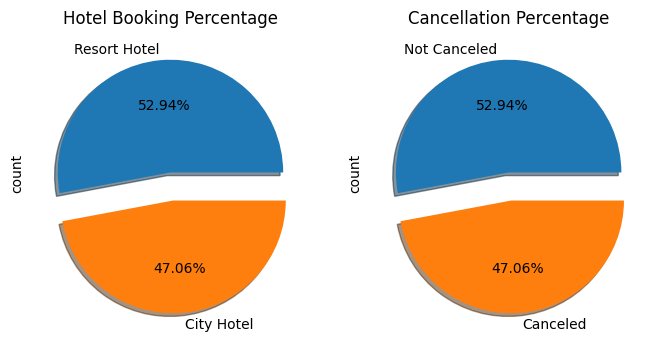

In [31]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))

# Plot for hotel booking percentage
plt.subplot(1, 2, 1)
df['hotel'].value_counts().plot.pie(
    explode=[0, 0.25],
    autopct='%1.2f%%',
    shadow=True
)
plt.title('Hotel Booking Percentage')

# Plot for cancellation percentage
plt.subplot(1, 2, 2)
df['is_canceled'].value_counts().plot.pie(
    explode=[0, 0.25],
    autopct='%1.2f%%',
    shadow=True,
    labels=['Not Canceled', 'Canceled']  # Adding labels
)
plt.title('Cancellation Percentage')

plt.show()


# **Chart 2**

C:\Users\bugad\AppData\Local\Temp\ipykernel_21116\3223328180.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=meal_df, x='meal name', y='meal count', palette=custom_palette)


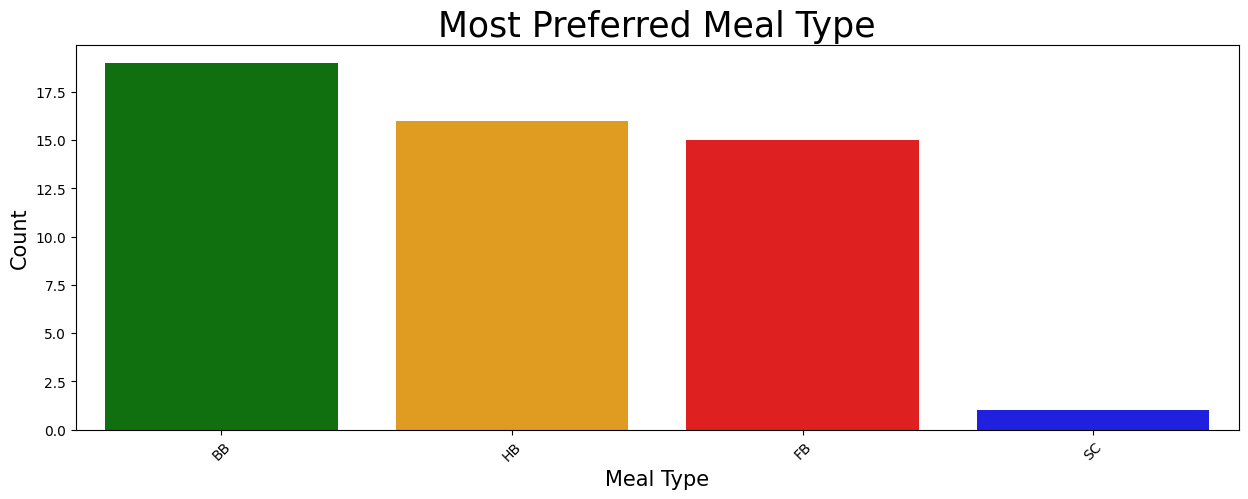

In [38]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Counting each meal type
meal_count = df['meal'].value_counts()

# Creating a dataset of each meal type and count
meal_df = pd.DataFrame({'meal name': meal_count.index, 'meal count': meal_count.values})

# Defining a custom color palette with sufficient colors
custom_palette = ['green', 'orange', 'red', 'blue']  # Adjust colors as needed

# Visualising the values on a bar chart with custom colors
plt.figure(figsize=(15, 5))
sns.barplot(data=meal_df, x='meal name', y='meal count', palette=custom_palette)
plt.title('Most Preferred Meal Type', fontsize=25)
plt.xlabel('Meal Type', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.xticks(rotation=45)  # Rotate labels for better readability
plt.show()


In [23]:
#Bed_and_Breakfast (B&B): Overnight stay + breakfast.
#Half_Board (HB): Overnight stay + breakfast + one additional meal (usually dinner).
#Full_Board (FB): Overnight stay + breakfast + lunch + dinner.
#Self_Catering:  no meals provided

**Insight**  
After visualizing the above chart we can see that BB - (Bed and Breakfast) is the most preffered meal type by guests.

# **Chart 3**

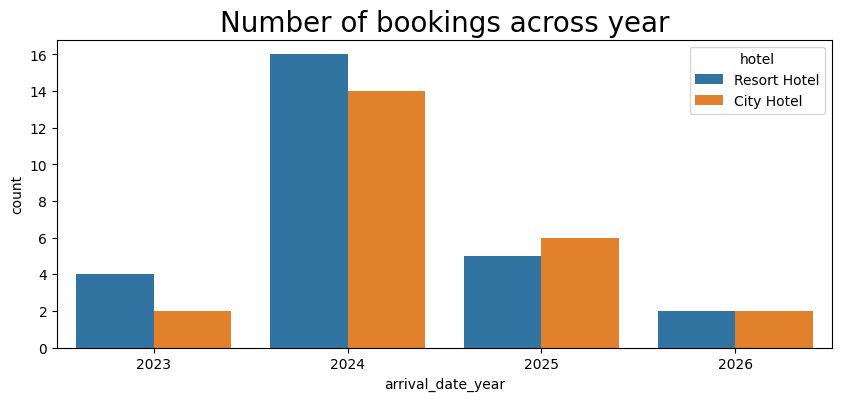

In [22]:
# Plotting with countplot
plt.figure(figsize=(10,4))
sns.countplot(x=df['arrival_date_year'],hue=df['hotel'])
plt.title("Number of bookings across year", fontsize = 20)
plt.show()

**Insight**  
From above insight we found out that hotel was booked most times in year 2016.

# **Chart 4**

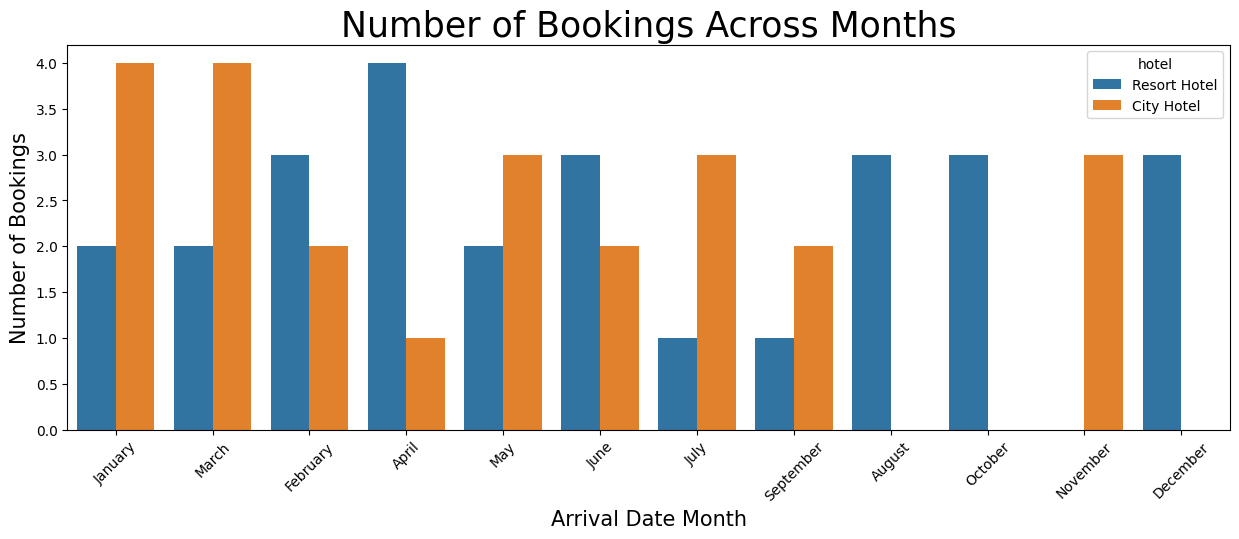

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Count the number of bookings for each month
booking_counts = df['arrival_date_month'].value_counts().sort_values(ascending=False)

# Sort the months in descending order based on the number of bookings
sorted_months = booking_counts.index.tolist()

plt.figure(figsize=(15, 5))
sns.countplot(x=df['arrival_date_month'], hue=df['hotel'], order=sorted_months)
plt.title("Number of Bookings Across Months", fontsize=25)
plt.xlabel('Arrival Date Month', fontsize=15)
plt.ylabel('Number of Bookings', fontsize=15)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

**Insight**  
Above insight shows that August and July ware 2 most busy months in compare to others.

# **Chart 5**

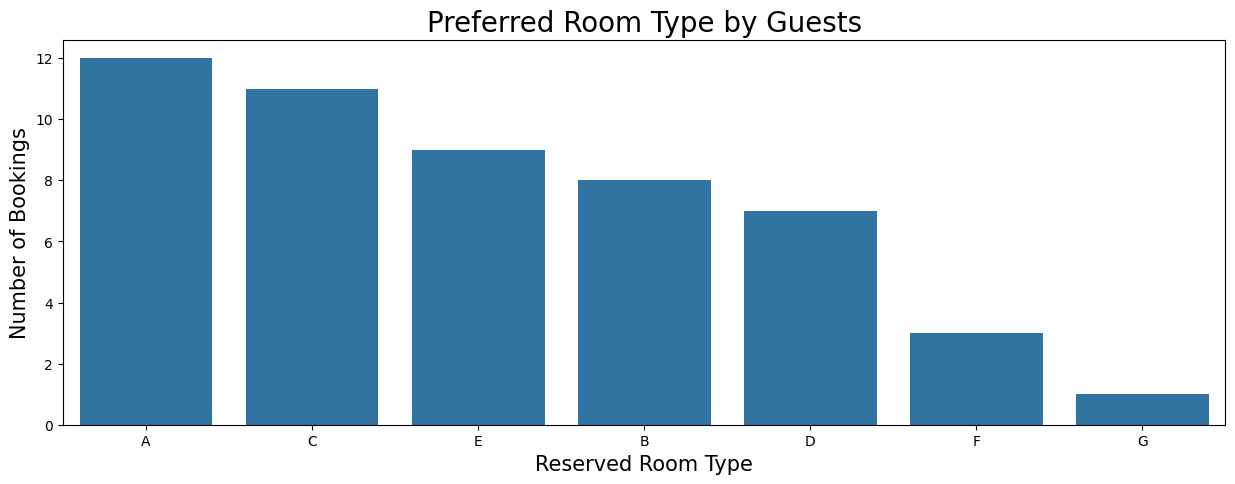

##### **A**: Standard Room (could be the most basic offering, typically without a view or additional amenities).
##### **B**: Deluxe Room (a step above the standard, often larger with better amenities or views).
##### **C**: Superior Room (higher quality or larger than a deluxe room, possibly with additional amenities).
##### **D**: Executive Room (designed for business travelers, may include a desk, high-speed internet, and other business amenities).
##### **E**: Family Room (larger room designed to accommodate families, often with additional beds or space).
##### **F**: Suite (a larger room or set of rooms, typically with a separate living area and sometimes a kitchenette).
##### **G**: Junior Suite (smaller suite, usually consisting of a large room with a separate seating area).
##### **H**: Presidential Suite (the most luxurious suite available, often occupying the top floor with premium amenities).
##### **I**: Interconnecting Room (rooms that are adjacent to each other with an internal door, ideal for families or groups).
##### **J**: Studio (a room that combines living, sleeping, and sometimes kitchen areas into one open space).
##### **K**: Penthouse (located on the top floor of a hotel, usually luxurious with a great view and private amenities).
##### **L**: Loft (a room or suite that features an open floor plan, often with high ceilings and modern decor).
##### **M**: Accessible Room (designed for guests with disabilities, often located on the ground floor with special accessibility features like wider doors, grab bars, and roll-in showers).
##### **N**: Non-smoking Room (a room specifically designated as non-smoking, often located on non-smoking floors).
##### **O**: Ocean View Room (room with a view of the ocean, typically at a higher price point).
##### **P**: Poolside Room (room located close to the pool, ideal for guests who want quick access to the pool area).

# **Chart 6**

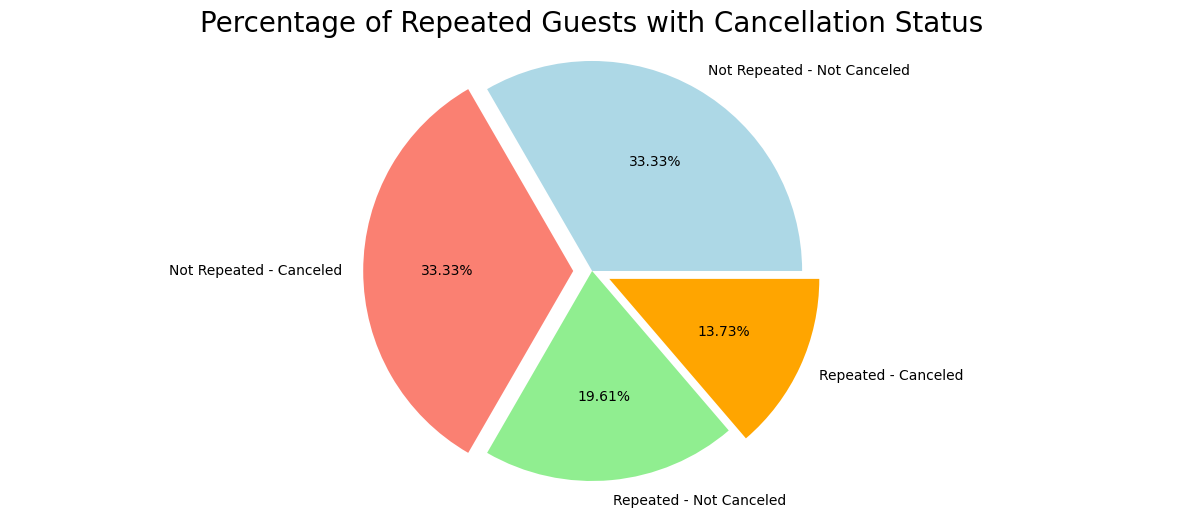

In [24]:
import matplotlib.pyplot as plt
import pandas as pd

# Group the data by 'is_repeated_guest' and 'is_canceled' to get counts for each combination
rep_guests_canceled = df.groupby(['is_repeated_guest', 'is_canceled']).size().reset_index(name='Count')

# Create a new column for labels to use in the pie chart
rep_guests_canceled['Label'] = rep_guests_canceled.apply(
    lambda row: f"{'Repeated' if row['is_repeated_guest'] == 1 else 'Not Repeated'} - {'Canceled' if row['is_canceled'] == 1 else 'Not Canceled'}", 
    axis=1
)

# Set up the figure size
plt.figure(figsize=(15, 6))

# Plotting the values in a pie chart
plt.pie(
    rep_guests_canceled['Count'],
    autopct='%1.2f%%',
    explode=(0.00, 0.09, 0.00, 0.09),  # Adjust explode to differentiate the slices
    shadow=False,
    labels=rep_guests_canceled['Label'],  # Use custom labels with repeated and cancellation status
    colors=['lightblue', 'salmon', 'lightgreen', 'orange']  # Optional: custom colors for better distinction
)

# Setting the title
plt.title('Percentage of Repeated Guests with Cancellation Status', fontsize=20)

# Setting the chart in the center
plt.axis('equal')

# Show the chart
plt.show()


**Insight**  
From above chart we can see that Not reapeated - not cancelled percentage is 33.33% , Not -repeated -Cancelled percentage is 33.33% , Repeated - Not Cancelled percentage is 19.61% and Repeated - Canceled percentage is 13.73%

# **Cahrt 7**

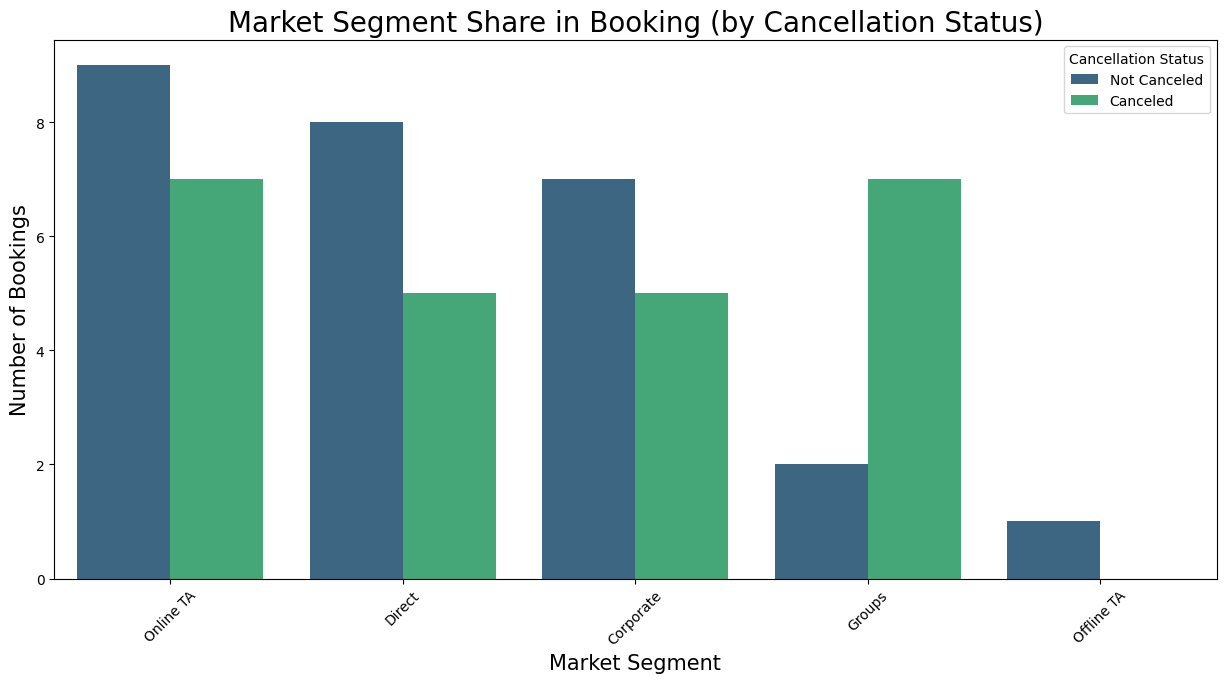

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(15, 7))

# Create a count plot with hue for 'is_canceled'
sns.countplot(
    x='market_segment',
    hue='is_canceled',
    data=df,
    order=df['market_segment'].value_counts().index,
    palette='viridis'  # Optional: custom color palette
)

# Set the title, x label, and y label
plt.title('Market Segment Share in Booking (by Cancellation Status)', fontsize=20)
plt.xlabel('Market Segment', fontsize=15)
plt.ylabel('Number of Bookings', fontsize=15)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Adding a legend to indicate cancellation status
plt.legend(title='Cancellation Status', labels=['Not Canceled', 'Canceled'])

# Show the chart
plt.show()


**Insight**  
From above chart we can see that in No deposite not cancelled rate is more than cancelled rate.

# Conclusion

**This project will provide valuable insights into the factors that determine hotel cancellation analysis, leveraging data analysis techniques.** 

**The results of this analysis could be beneficial for hotel owner and the hotel industry in enhancing revenue and customer satisfaction.** 

**This project provides a comprehensive overview of the findings, their implications, and actionable recommendations, while also suggesting areas for 
future research.**
    
**It aims to encapsulate the core insights gained from the analysis and guide strategic decisions to improve hotel operations and performance.**

# Recomendation

**Resort Hotel is most preffered so Stakeholders can offer discounts on City Hotel to increase bookings.**

**Around 27.52% of bookings are cancelled so Hotel can offer layality discount if guests don't cancel their booking.**

**Hotel can maintain raw materials for BB type meal in advance to avoid delay as BB(Bead and Breakfast) is the most preffered meal.**

**Hotel should increase number of rooms in City Hotels to decrease the waiting time.**
    
**TA has the most number of bookings over other MArket segments so Hotel could run some offer to get more bookings from otehr segment.**

**Room type A is most preffered by guests so Hotel should increase the number of A type room.**

**Number of repeated guests is low that indicates that there is something they don't like about Hotel and that needs to be fixed to increase number of 
repeated guests.**

**Waiting time period for City hotel is high as compared to resort hotels. That means city hotels are much busier than Resort hotels.**

